In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report as cr, confusion_matrix as cm

In [2]:
data = pd.read_csv('Abalone.csv')
data.head()

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [3]:
data.columns = ['Sex','Length','Diameter','Height','Wholeweight','Shuckedweight','Viseraaweight','Shellweight','Rings']

In [4]:
data.head()

,Sex,Length,Diameter,Height,Wholeweight,Shuckedweight,Viseraaweight,Shellweight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


## CASE - 2

In [5]:
data['Rings'] = data['Rings'].mask(data['Rings'] <= 15, 0)

In [6]:
data['Rings'] = data['Rings'].mask(data['Rings'] >15, 1)

##### Prevalance Rate:  Case: 1 == threshold 10, case: 2 == threshold 15


In [7]:
data.Rings.value_counts(normalize = True) * 100

0    93.75
1     6.25
Name: Rings, dtype: float64

Minority class is 34% hence it crossed threshold value of 25%,

In [8]:
data.Sex.unique()

array(['M', 'F', 'I'], dtype=object)

In [9]:
data.Sex = data.Sex.replace({'M': 1, 'F':2,'I':3})

In [10]:
data.Sex.unique()

array([1, 2, 3], dtype=int64)

In [11]:
data

,Sex,Length,Diameter,Height,Wholeweight,Shuckedweight,Viseraaweight,Shellweight,Rings
0,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,0
1,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,0
2,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,0
3,3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0
4,3,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,0
...,...,...,...,...,...,...,...,...,...
4171,2,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,0
4172,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,0
4173,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,0
4174,2,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,0


In [12]:
x = data.drop(['Rings'], axis = 1)
y = data.Rings

In [13]:
x, y

(      Sex  Length  Diameter  Height  Wholeweight  Shuckedweight  \
 0       1   0.350     0.265   0.090       0.2255         0.0995   
 1       2   0.530     0.420   0.135       0.6770         0.2565   
 2       1   0.440     0.365   0.125       0.5160         0.2155   
 3       3   0.330     0.255   0.080       0.2050         0.0895   
 4       3   0.425     0.300   0.095       0.3515         0.1410   
 ...   ...     ...       ...     ...          ...            ...   
 4171    2   0.565     0.450   0.165       0.8870         0.3700   
 4172    1   0.590     0.440   0.135       0.9660         0.4390   
 4173    1   0.600     0.475   0.205       1.1760         0.5255   
 4174    2   0.625     0.485   0.150       1.0945         0.5310   
 4175    1   0.710     0.555   0.195       1.9485         0.9455   
 
       Viseraaweight  Shellweight  
 0            0.0485       0.0700  
 1            0.1415       0.2100  
 2            0.1140       0.1550  
 3            0.0395       0.0550  
 4

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, stratify = y)

In [15]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2923, 8), (1253, 8), (2923,), (1253,))

Train Prevalance Rate

In [16]:
y_train.value_counts(normalize = True) * 100

0    93.739309
1     6.260691
Name: Rings, dtype: float64

Test Prevalance Rate

In [17]:
y_test.value_counts(normalize = True) *100

0    93.77494
1     6.22506
Name: Rings, dtype: float64

In [18]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [19]:
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)

print('Train Predicted Values ',np.argmax(pred_train, axis  = 1)) 
print('Test Predicted Values ',np.argmax(pred_test, axis = 1))

#### By default our threshold value is 0.5

In [20]:
from sklearn.metrics import classification_report as cr, confusion_matrix as cm

In [21]:
def metrics_test(a,b):
    cr_test = cr(a, b)
    print('Test Report: ')
    print('\n',cr_test)
    cm_test = cm(a,b)
    print('Test Confusion Matrix:')
    print('\n',cm_test)

In [22]:
def metrics_train(a,b):
    cr_train = cr(a, b)
    print("Train Report: ")
    print('\n',cr_train)
    cm_train = cm(a,b)
    print('Train Confusion Matrix:')
    print('\n',cm_train)

In [23]:
from sklearn.metrics import accuracy_score

print('Accuracy for Train: ',accuracy_score(y_train, pred_train))
print('Accuracy for Test: ',accuracy_score(y_test, pred_test))

Accuracy for Train:  0.9408142319534725
Accuracy for Test:  0.9385474860335196


In [24]:
metrics_train(y_train, pred_train)

Train Report: 

               precision    recall  f1-score   support

           0       0.94      1.00      0.97      2740
           1       0.81      0.07      0.13       183

    accuracy                           0.94      2923
   macro avg       0.88      0.53      0.55      2923
weighted avg       0.93      0.94      0.92      2923

Train Confusion Matrix:

 [[2737    3]
 [ 170   13]]


In [25]:
metrics_test(y_test, pred_test)

Test Report: 

               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1175
           1       0.55      0.08      0.13        78

    accuracy                           0.94      1253
   macro avg       0.74      0.54      0.55      1253
weighted avg       0.92      0.94      0.92      1253

Test Confusion Matrix:

 [[1170    5]
 [  72    6]]


## CASE-1

In [26]:
df = pd.read_csv('Abalone.csv')
df.columns = ['Sex','Length','Diameter','Height','Wholeweight','Shuckedweight','Viseraaweight','Shellweight','Rings']
df

,Sex,Length,Diameter,Height,Wholeweight,Shuckedweight,Viseraaweight,Shellweight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [27]:
df.Sex = df.Sex.replace({'M': 1, 'F':2,'I':3})

In [28]:
df

,Sex,Length,Diameter,Height,Wholeweight,Shuckedweight,Viseraaweight,Shellweight,Rings
0,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,3,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
4171,2,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,2,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [29]:
df['Rings'] = df['Rings'].mask(df['Rings'] <=10, 0)

In [30]:
df

,Sex,Length,Diameter,Height,Wholeweight,Shuckedweight,Viseraaweight,Shellweight,Rings
0,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,0
1,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,0
2,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,0
3,3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0
4,3,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,0
...,...,...,...,...,...,...,...,...,...
4171,2,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,0
4173,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,0
4174,2,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,0


In [31]:
df['Rings']= df['Rings'].mask(df['Rings'] > 9, 1)

In [32]:
df

,Sex,Length,Diameter,Height,Wholeweight,Shuckedweight,Viseraaweight,Shellweight,Rings
0,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,0
1,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,0
2,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,0
3,3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0
4,3,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,0
...,...,...,...,...,...,...,...,...,...
4171,2,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,1
4172,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,0
4173,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,0
4174,2,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,0


In [33]:
df.Rings.value_counts(normalize = True)

0    0.653736
1    0.346264
Name: Rings, dtype: float64

balanced Dataset

In [34]:
x = df.drop(['Rings'], axis = 1)
y = df.Rings

In [35]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, stratify = y)

In [36]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((2923, 8), (1253, 8), (2923,), (1253,))

In [37]:
# Prevalance rate

print('Train Prevalance Rate: ',ytrain.value_counts(normalize = True)*100)
print('Test prevalance Rate: ', ytest.value_counts(normalize = True) * 100)

Train Prevalance Rate:  0    65.378036
1    34.621964
Name: Rings, dtype: float64
Test prevalance Rate:  0    65.363128
1    34.636872
Name: Rings, dtype: float64


In [38]:
model.fit(xtrain, ytrain)

LogisticRegression()

In [39]:
pre_train = model.predict(xtrain)
pre_test = model.predict(xtest)

In [40]:
print(model.predict(xtrain))
print(model.predict(xtest))

[1 0 0 ... 0 0 1]
[0 1 0 ... 0 0 0]


In [41]:
pre_train, pre_test

(array([1, 0, 0, ..., 0, 0, 1], dtype=int64),
 array([0, 1, 0, ..., 0, 0, 0], dtype=int64))

In [42]:
from sklearn.metrics import accuracy_score

print('Accuracy for Train: ',accuracy_score(ytrain, pre_train))
print('Accuracy for Test: ',accuracy_score(ytest, pre_test))

Accuracy for Train:  0.7677044132740335
Accuracy for Test:  0.7605746209098164


In [43]:
metrics_test(ytest, pre_test)

Test Report: 

               precision    recall  f1-score   support

           0       0.78      0.88      0.83       819
           1       0.70      0.54      0.61       434

    accuracy                           0.76      1253
   macro avg       0.74      0.71      0.72      1253
weighted avg       0.75      0.76      0.75      1253

Test Confusion Matrix:

 [[717 102]
 [198 236]]


In [44]:
metrics_train(ytrain, pre_train)

Train Report: 

               precision    recall  f1-score   support

           0       0.79      0.88      0.83      1911
           1       0.71      0.55      0.62      1012

    accuracy                           0.77      2923
   macro avg       0.75      0.72      0.73      2923
weighted avg       0.76      0.77      0.76      2923

Train Confusion Matrix:

 [[1686  225]
 [ 454  558]]


In [45]:
import statsmodels.api as sm

sm.Logit(y_train, sm.add_constant(x_train)).fit().summary()

Optimization terminated successfully.
         Current function value: 0.158486
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Rings   No. Observations:                 2923
Model:                          Logit   Df Residuals:                     2914
Method:                           MLE   Df Model:                            8
Date:                Wed, 22 Dec 2021   Pseudo R-squ.:                  0.3229
Time:                        11:18:40   Log-Likelihood:                -463.26
converged:                       True   LL-Null:                       -684.22
Covariance Type:            nonrobust   LLR p-value:                 1.984e-90
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -6.0408      1.171     -5.158      0.000      -8.336      -3.746
Sex              -0.2200      0.136     -1.623      0.105      -0.486       0.046
Length           -3.7512      4.590     -0.817      0.414     -12.748       5.246
Diameter          7.2989      5.368      1.360      0.174      -3.222      17.820
Height           14.0447      4.491      3.127      0.002       5.242      22.847
Wholeweight       8.8009      1.399      6.289      0.000       6.058      11.544
Shuckedweight   -19.5979      1.971     -9.945      0.000     -23.460     -15.736
Viseraaweight   -10.1517      2.668     -3.805      0.000     -15.381      -4.922
Shellweight       5.9734      2.276      2.625      0.009       1.513      10.434
=================================================================================
"""

In [46]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
x_train1 = scale.fit_transform(x_train)
x_test1 = scale.transform(x_test)

In [47]:
model.fit(x_train1, y_train)

LogisticRegression()

In [48]:
pr = model.predict(x_test1)
pr

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [49]:
pra = model.predict(x_train1)
pra

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [50]:
from sklearn.metrics import accuracy_score

print('Accuracy for Train: ',accuracy_score(ytrain, pra))
print('Accuracy for Test: ',accuracy_score(ytest, pr))

Accuracy for Train:  0.6530961341087923
Accuracy for Test:  0.6512370311252993


In [51]:
sm.Logit(y_train, sm.add_constant(x_train1)).fit().summary()

Optimization terminated successfully.
         Current function value: 0.158486
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Rings   No. Observations:                 2923
Model:                          Logit   Df Residuals:                     2914
Method:                           MLE   Df Model:                            8
Date:                Wed, 22 Dec 2021   Pseudo R-squ.:                  0.3229
Time:                        11:18:40   Log-Likelihood:                -463.26
converged:                       True   LL-Null:                       -684.22
Covariance Type:            nonrobust   LLR p-value:                 1.984e-90
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.9822      0.878     -6.810      0.000      -7.704      -4.260
x1            -0.4400      0.271     -1.623      0.105      -0.971       0.091
x2            -2.5883      3.167     -0.817      0.414      -8.796       3.620
x3             3.9414      2.899      1.360      0.174      -1.740       9.623
x4             7.2330      2.313      3.127      0.002       2.700      11.766
x5            24.7965      3.943      6.289      0.000      17.069      32.524
x6           -29.1127      2.927     -9.945      0.000     -34.850     -23.375
x7            -6.5072      1.710     -3.805      0.000      -9.859      -3.155
x8             5.9854      2.280      2.625      0.009       1.516      10.455
==============================================================================
"""

In [52]:
x_train2 = scale.fit_transform(x_train)
x_test2  =scale.fit_transform(x_test)

In [53]:
model.fit(x_train2, y_train)

LogisticRegression()

In [54]:
pwq = model.predict(x_train2)
per = model.predict(x_test2)

In [55]:
print('Accuracy for Train: ',accuracy_score(ytrain, pwq))
print('Accuracy for Test: ',accuracy_score(ytest, per))

Accuracy for Train:  0.6530961341087923
Accuracy for Test:  0.6520351157222666


In [56]:
sm.Logit(y_train, sm.add_constant(x_train2)).fit().summary()

Optimization terminated successfully.
         Current function value: 0.158486
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Rings   No. Observations:                 2923
Model:                          Logit   Df Residuals:                     2914
Method:                           MLE   Df Model:                            8
Date:                Wed, 22 Dec 2021   Pseudo R-squ.:                  0.3229
Time:                        11:18:41   Log-Likelihood:                -463.26
converged:                       True   LL-Null:                       -684.22
Covariance Type:            nonrobust   LLR p-value:                 1.984e-90
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.9822      0.878     -6.810      0.000      -7.704      -4.260
x1            -0.4400      0.271     -1.623      0.105      -0.971       0.091
x2            -2.5883      3.167     -0.817      0.414      -8.796       3.620
x3             3.9414      2.899      1.360      0.174      -1.740       9.623
x4             7.2330      2.313      3.127      0.002       2.700      11.766
x5            24.7965      3.943      6.289      0.000      17.069      32.524
x6           -29.1127      2.927     -9.945      0.000     -34.850     -23.375
x7            -6.5072      1.710     -3.805      0.000      -9.859      -3.155
x8             5.9854      2.280      2.625      0.009       1.516      10.455
==============================================================================
"""

In [57]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [58]:
        pre_train = model.predict(x_train)
        pre_test = model.predict(x_test)

In [59]:
from sklearn.metrics import accuracy_score

print('Accuracy for Train: ',accuracy_score(y_train, pre_train))
print('Accuracy for Test: ',accuracy_score(y_test, pre_test))

Accuracy for Train:  0.9394457748888129
Accuracy for Test:  0.9393455706304868


In [60]:
from tqdm import tqdm
Result = pd.DataFrame(columns = ['K', 'Training','Test'])

for k in tqdm(range(1,201)):
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(x_train, y_train)
    
    pre_train = knn.predict(x_train)
    pre_test = knn.predict(x_test)
    
    Result = Result.append({'K': k, 'Training': accuracy_score(y_train, pre_train), 'Test': accuracy_score(y_test, pre_test)}, ignore_index =True)


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:42<00:00,  4.76it/s]


In [61]:
Result

,K,Training,Test
0,1.0,1.000000,0.920990
1,2.0,0.955183,0.937749
2,3.0,0.958604,0.941740
3,4.0,0.944577,0.942538
4,5.0,0.947999,0.942538
...,...,...,...
195,196.0,0.937393,0.937749
196,197.0,0.937393,0.937749
197,198.0,0.937393,0.937749
198,199.0,0.937393,0.937749


<AxesSubplot:xlabel='K', ylabel='Training'>

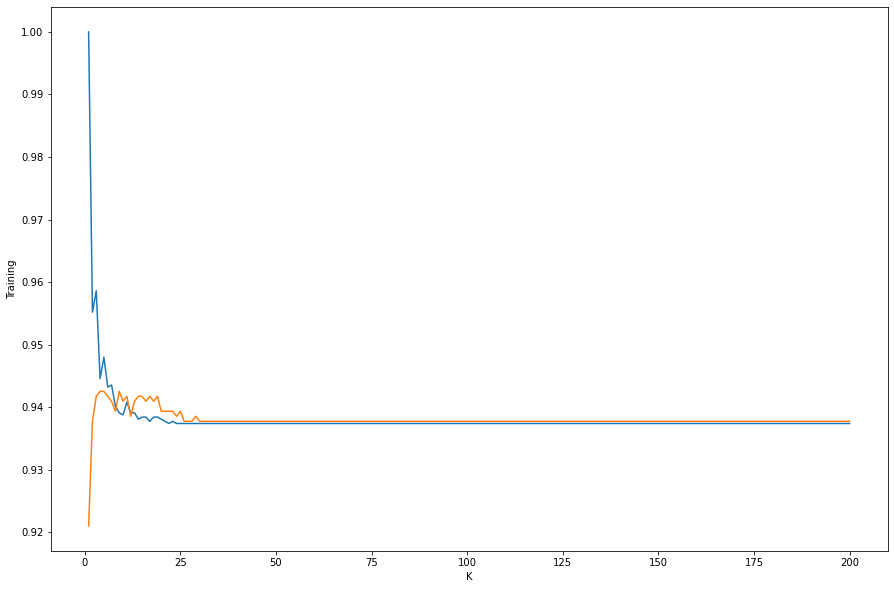

In [62]:
plt.figure(figsize = (15,10))
sns.lineplot(data = Result, x = 'K', y = 'Training')
sns.lineplot(data = Result, x = 'K', y = 'Test')


In [63]:
from tqdm import tqdm
Result = pd.DataFrame(columns = ['K', 'Training','Test'])

for k in tqdm(range(1,26)):
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(x_train, y_train)
    
    pre_train = knn.predict(x_train)
    pre_test = knn.predict(x_test)
    
    Result = Result.append({'K': k, 'Training': accuracy_score(y_train, pre_train), 'Test': accuracy_score(y_test, pre_test)}, ignore_index =True)


100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:03<00:00,  6.80it/s]


<AxesSubplot:xlabel='K', ylabel='Training'>

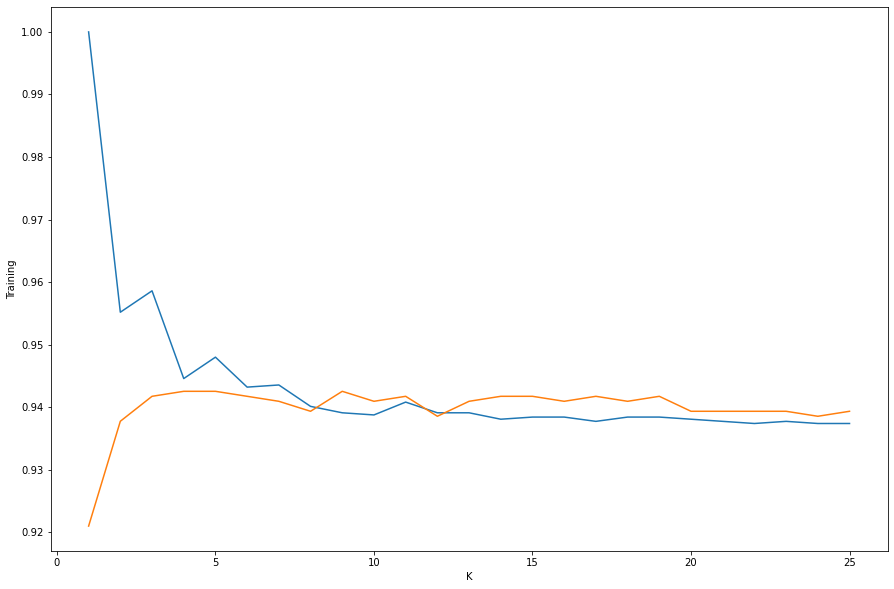

In [64]:
plt.figure(figsize = (15,10))
sns.lineplot(data = Result, x = 'K', y = 'Training')
sns.lineplot(data = Result, x = 'K', y = 'Test')


In [69]:
knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(x_train, y_train)

pre_train = knn.predict(x_train)
pre_test = knn.predict(x_test)

print('Accuracy for Train: ',accuracy_score(y_train, pre_train))
print('Accuracy for Test: ',accuracy_score(y_test, pre_test))

Accuracy for Train:  0.9586041737940472
Accuracy for Test:  0.9417398244213887


In [70]:
knn = KNeighborsClassifier(n_neighbors= 4)
knn.fit(x_train, y_train)

pre_train = knn.predict(x_train)
pre_test = knn.predict(x_test)

print('Accuracy for Train: ',accuracy_score(y_train, pre_train))
print('Accuracy for Test: ',accuracy_score(y_test, pre_test))

Accuracy for Train:  0.9445774888812863
Accuracy for Test:  0.942537909018356
